# Assignment 9

Dear all,

Each group must create their branch named group_#_ass_9 2022(group_1_ass_9_2022) and save their results in the Assignment9 folder. Name your JN like your branch.

1. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [141]:
#importamos las librerías necesarias para el trabajo
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os

In [142]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [2]:
os.chdir(r"D:\Users\u_dae\Documents\GitHub\Diplomado_PUCP\Lecture_11")

In [3]:
depe = open(r'../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(depe) #para detectar el tipo de "encoding" que tiene la base de datos (si consisdera tildes, letras raras,...)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [25]:
de_data = pd.read_csv( r'../_data/data_dengue_peru.csv', encoding = charenc) #importamos los datos considerando el tipo de encoding
de_data.head( 5 )

D:\Users\u_dae\AppData\Local\Temp\ipykernel_4488\3162203798.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  de_data = pd.read_csv( r'../_data/data_dengue_peru.csv', encoding = charenc) #importamos los datos considerando el tipo de encoding


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0


2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [5]:
#generamos una ubigeo tipo string 
de_data["Ubigeo_String"] = de_data['Ubigeo'].astype(str)
#generamos una columna con el número de letras por el string de ubigeo
de_data["Ubigeo_Largo"] = de_data["Ubigeo_String"].str.len()
de_data.head(3)
#de esta forma podemos identificar a las observaciones que cuenten con un ubigeo de 5 números (dado que no se incluye el 0) y no 6

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_String,Ubigeo_Largo
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,80914,5
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,6
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,6


In [20]:
#generamos un dataframe con solo las observaciones que registran un ubigeo con 5 caracteres
de_5 = de_data[de_data["Ubigeo_Largo"]==5]
de_5["Ubigeo_String"] = "0" + de_5["Ubigeo_String"] #y le agregamos el cero a esta columna
de_5

D:\Users\u_dae\AppData\Local\Temp\ipykernel_4488\240032830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_5["Ubigeo_String"] = "0" + de_5["Ubigeo_String"]


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_String,Ubigeo_Largo,Ubigeo_5letras
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,5,80914
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,080914,5,80914
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,5,80914
5,2020,47,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,7.0,080914,5,80914
15,2019,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,080914,5,80914
...,...,...,...,...,...,...,...,...,...,...,...
172119,2018,49,Dengue,AYACUCHO,ANCO,LA MAR,50502,0.0,050502,5,50502
172120,2018,50,Dengue,AYACUCHO,ANCO,LA MAR,50502,0.0,050502,5,50502
172121,2018,51,Dengue,AYACUCHO,ANCO,LA MAR,50502,0.0,050502,5,50502
172122,2018,52,Dengue,AYACUCHO,ANCO,LA MAR,50502,0.0,050502,5,50502


In [22]:
de_6 = de_data[de_data["Ubigeo_Largo"]==6] #filtramos para tener un dataframe con ubigeos de 6 observaciones
de_6

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_String,Ubigeo_Largo,Ubigeo_5letras
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,6,80101
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,6,80101
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,150112,6,50112
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,150143,6,50143
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,150103,6,50103
...,...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,6,70203
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,6,70303
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,6,70203
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,6,70303


In [26]:
new_de = de_5.append(de_6, ignore_index=True)
print(len(new_de)==len(de_data)) #confirmamos que el dataframe generado tiene el mismo número de observaciones

True


D:\Users\u_dae\AppData\Local\Temp\ipykernel_4488\2614076292.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_de = de_5.append(de_6, ignore_index=True)


In [36]:
new_de['Ubigeo_Departamento'] = new_de['Ubigeo_String'].astype(str).str[0:2] #guardamos en una nueva columna los dos primeros caracteres del ubigeo para identificar departamentos
new_de['Ubigeo_Provincia'] = new_de['Ubigeo_String'].astype(str).str[0:4] #y otra para identificar provincias (4 primerso caracteres)
new_de

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_String,Ubigeo_Largo,Ubigeo_5letras,Ubigeo_Departamento,Ubigeo_Provincia
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,5,80914,08,0809
1,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,080914,5,80914,08,0809
2,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,5,80914,08,0809
3,2020,47,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,7.0,080914,5,80914,08,0809
4,2019,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,080914,5,80914,08,0809
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,6,70203,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,6,70303,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,6,70203,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,6,70303,17,1703


3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

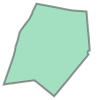

In [146]:
maps = gpd.read_file(r'../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
maps["geometry"][495]

In [148]:
maps

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [149]:
maps = maps[['UBIGEO', 'geometry']]
maps

,UBIGEO,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [150]:
maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

D:\Users\u_dae\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,UBIGEO,geometry
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


Ahora bien, la variable Casos está en un formato que considera la separación de miles por coma: por ejemplo, 1040 es registrado como 1,040. Deberemos cambiar esto para poder usar la información de esta columna como integrer o float

In [151]:
new_de["Casos"].dropna(inplace=True) #eliminamos las observaciones missing
len(new_de) #lo que nos deja con un total de 172'144 observaciones

172144

In [152]:
new_de["Casos_Coma"] = new_de['Casos'].str[1] 
new_de["Casos_Coma"].describe()

count     2283
unique      11
top          0
freq       355
Name: Casos_Coma, dtype: object

In [153]:
new_de["Casos_Coma"].unique() #notamos que en algunas observaciones el segundo caracter es una coma (,), nosotros cambiaremos esto

array([nan, '4', '1', '3', '6', '2', '9', '7', '5', '0', '8', ','],
      dtype=object)

In [154]:
#generamos dos dataframes, uno con observaciones que tienen coma en la columna de casos y otro con el resto de observaciones
new_de1 = new_de[new_de["Casos_Coma"]==","]
new_de2 = new_de[new_de["Casos_Coma"]!=","]

In [155]:
# como estas observaciones tienen 4 caracteres (sin contar la coma), podemos "reconstruir" el número al excluir la coma del elemento
new_de1["Casos_X"] = new_de1["Casos"].str[0] + new_de1["Casos"].str[2] + new_de1["Casos"].str[3] + new_de1["Casos"].str[4]
new_de1["Casos_X"] 

D:\Users\u_dae\AppData\Local\Temp\ipykernel_4488\2338362911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_de1["Casos_X"] = new_de1["Casos"].str[0] + new_de1["Casos"].str[2] + new_de1["Casos"].str[3] + new_de1["Casos"].str[4]


93666    1364
93675    1006
93776    1895
93778    1029
93790    1746
93791    2084
93792    1308
Name: Casos_X, dtype: object

In [156]:
new_de1["Casos"] = new_de1["Casos_X"] #copiamos el resultado en la columna correspondiente a casos

D:\Users\u_dae\AppData\Local\Temp\ipykernel_4488\2183913265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_de1["Casos"] = new_de1["Casos_X"] #copiamos el resultado en la columna correspondiente a casos


In [157]:
#y eliminamos la columna de Casos_X
new_de1 = new_de1.drop(columns=["Casos_X", "Casos_Coma"])
new_de2 = new_de2.drop(columns=["Casos_Coma"])

In [158]:
new_de1.columns

Index(['Año', 'Semana', 'Eventos o daños', 'Departamento', 'Distrito',
       'Provincia', 'Ubigeo', 'Casos', 'Ubigeo_String', 'Ubigeo_Largo',
       'Ubigeo_5letras', 'Ubigeo_Departamento', 'Ubigeo_Provincia'],
      dtype='object')

In [159]:
new_de2.columns

Index(['Año', 'Semana', 'Eventos o daños', 'Departamento', 'Distrito',
       'Provincia', 'Ubigeo', 'Casos', 'Ubigeo_String', 'Ubigeo_Largo',
       'Ubigeo_5letras', 'Ubigeo_Departamento', 'Ubigeo_Provincia'],
      dtype='object')

In [160]:
new_de2["Casos"].unique() #debemos eliminar los nan del dataframe

array([2.0, 0.0, 7.0, nan, 5.0, 11.0, 10.0, 9.0, 18.0, 1.0, 8.0, 15.0,
       29.0, 23.0, 6.0, 16.0, 25.0, 24.0, 46.0, 54.0, 41.0, 28.0, 12.0,
       17.0, 14.0, 44.0, 31.0, 48.0, 36.0, 53.0, 39.0, 38.0, 40.0, 86.0,
       49.0, 69.0, 64.0, 27.0, 57.0, 75.0, 50.0, 33.0, 20.0, 3.0, 4.0,
       47.0, 42.0, 56.0, 55.0, 35.0, 32.0, 37.0, 45.0, 72.0, 93.0, 91.0,
       63.0, 70.0, 19.0, 13.0, 67.0, '0', '1', '2', '14', '11', '13',
       '26', '5', '4', '3', '22', '19', '9', '17', '15', '12', '16', '23',
       '27', '6', '93', '107', '98', '113', '102', '127', '96', '83',
       '82', '72', '70', '68', '44', '56', '48', '53', '33', '59', '81',
       '64', '8', '90', '103', '58', '7', '10', '18', '28', '38', '73',
       '109', '121', '69', '20', '21', '30', '24', '29', '47', '35', '45',
       '36', '40', '50', '101', '145', '88', '97', '61', '41', '39', '31',
       '34', '57', '25', '46', '51', '42', '32', '60', '75', '95', '110',
       '37', 22.0, 21.0, 43.0, 26.0, 62.0, 30.0, 34.0, 5

In [161]:
new_de2 = new_de2[new_de2["Casos"].notna()] #eliminamos los nan de la variable casos

In [162]:
new_frame = new_de1.append(new_de2, ignore_index=True)
new_frame

D:\Users\u_dae\AppData\Local\Temp\ipykernel_4488\1867869765.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_frame = new_de1.append(new_de2, ignore_index=True)


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_String,Ubigeo_Largo,Ubigeo_5letras,Ubigeo_Departamento,Ubigeo_Provincia
0,2017,15,Dengue,PIURA,PIURA,PIURA,200101,1364,200101,6,00101,20,2001
1,2017,18,Dengue,PIURA,VEINTISEIS DE OCTUBRE,PIURA,200115,1006,200115,6,00115,20,2001
2,2017,16,Dengue,PIURA,PIURA,PIURA,200101,1895,200101,6,00101,20,2001
3,2017,19,Dengue,PIURA,VEINTISEIS DE OCTUBRE,PIURA,200115,1029,200115,6,00115,20,2001
4,2017,17,Dengue,PIURA,PIURA,PIURA,200101,1746,200101,6,00101,20,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166042,2018,28,Dengue,HUANUCO,CHOLON,MARAÑON,100702,0.0,100702,6,00702,10,1007
166043,2018,29,Dengue,HUANUCO,CHOLON,MARAÑON,100702,0.0,100702,6,00702,10,1007
166044,2018,30,Dengue,HUANUCO,CHOLON,MARAÑON,100702,0.0,100702,6,00702,10,1007
166045,2018,31,Dengue,HUANUCO,CHOLON,MARAÑON,100702,0.0,100702,6,00702,10,1007


In [163]:
new_frame["Casos"] = new_frame["Casos"].astype(int)
new_frame.describe() #ahora la variable casos es int

,Año,Semana,Ubigeo,Casos,Ubigeo_Largo
count,166047.000000,166047.000000,166047.000000,166047.000000,166047.000000
mean,2017.906123,26.265630,150675.360723,1.454733,5.825838
std,1.949266,15.061631,63437.693600,15.080270,0.379249
min,2015.000000,1.000000,10101.000000,0.000000,5.000000
25%,2016.000000,13.000000,110202.000000,0.000000,6.000000
50%,2018.000000,26.000000,160102.000000,0.000000,6.000000
75%,2020.000000,39.000000,200703.000000,0.000000,6.000000
max,2021.000000,53.000000,250401.000000,2084.000000,6.000000


<AxesSubplot:>

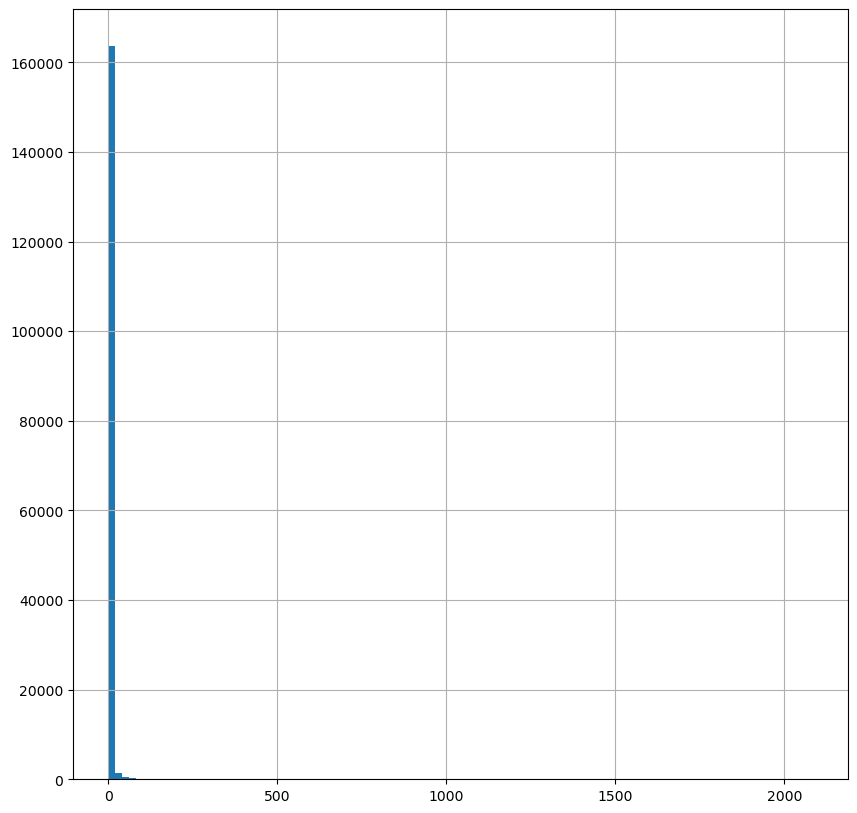

In [164]:
# Contemplamos la distribución de la variable
fig, ax = plt.subplots(figsize=(10, 10))
new_frame["Casos"].hist(bins = 100)

Unimos la data de dengue con el shapefile

In [170]:
new_frame.rename(columns={"Ubigeo": "UBIGEO"}, inplace=True)

In [171]:
dataset = pd.merge(maps, new_frame, how="inner", on="UBIGEO")
dataset

,UBIGEO,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,Ubigeo_String,Ubigeo_Largo,Ubigeo_5letras,Ubigeo_Departamento,Ubigeo_Provincia
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,19,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,140106,6,40106,14,1401
1,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,140106,6,40106,14,1401
2,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,140106,6,40106,14,1401
3,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,23,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,140106,6,40106,14,1401
4,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,24,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,140106,6,40106,14,1401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166042,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2019,49,Dengue,JUNIN,MAZAMARI,SATIPO,0,120604,6,20604,12,1206
166043,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2019,50,Dengue,JUNIN,MAZAMARI,SATIPO,0,120604,6,20604,12,1206
166044,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2019,51,Dengue,JUNIN,MAZAMARI,SATIPO,0,120604,6,20604,12,1206
166045,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2019,52,Dengue,JUNIN,MAZAMARI,SATIPO,0,120604,6,20604,12,1206


In [179]:
#Filtramos la data por año (2021)
dataset_2021 = dataset[dataset["Año"]==2021]
dataset_2021.head(3)

,UBIGEO,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,Ubigeo_String,Ubigeo_Largo,Ubigeo_5letras,Ubigeo_Departamento,Ubigeo_Provincia
20,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,1,140106,6,40106,14,1401
21,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,140106,6,40106,14,1401
34,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,1,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,140106,6,40106,14,1401


<AxesSubplot:>

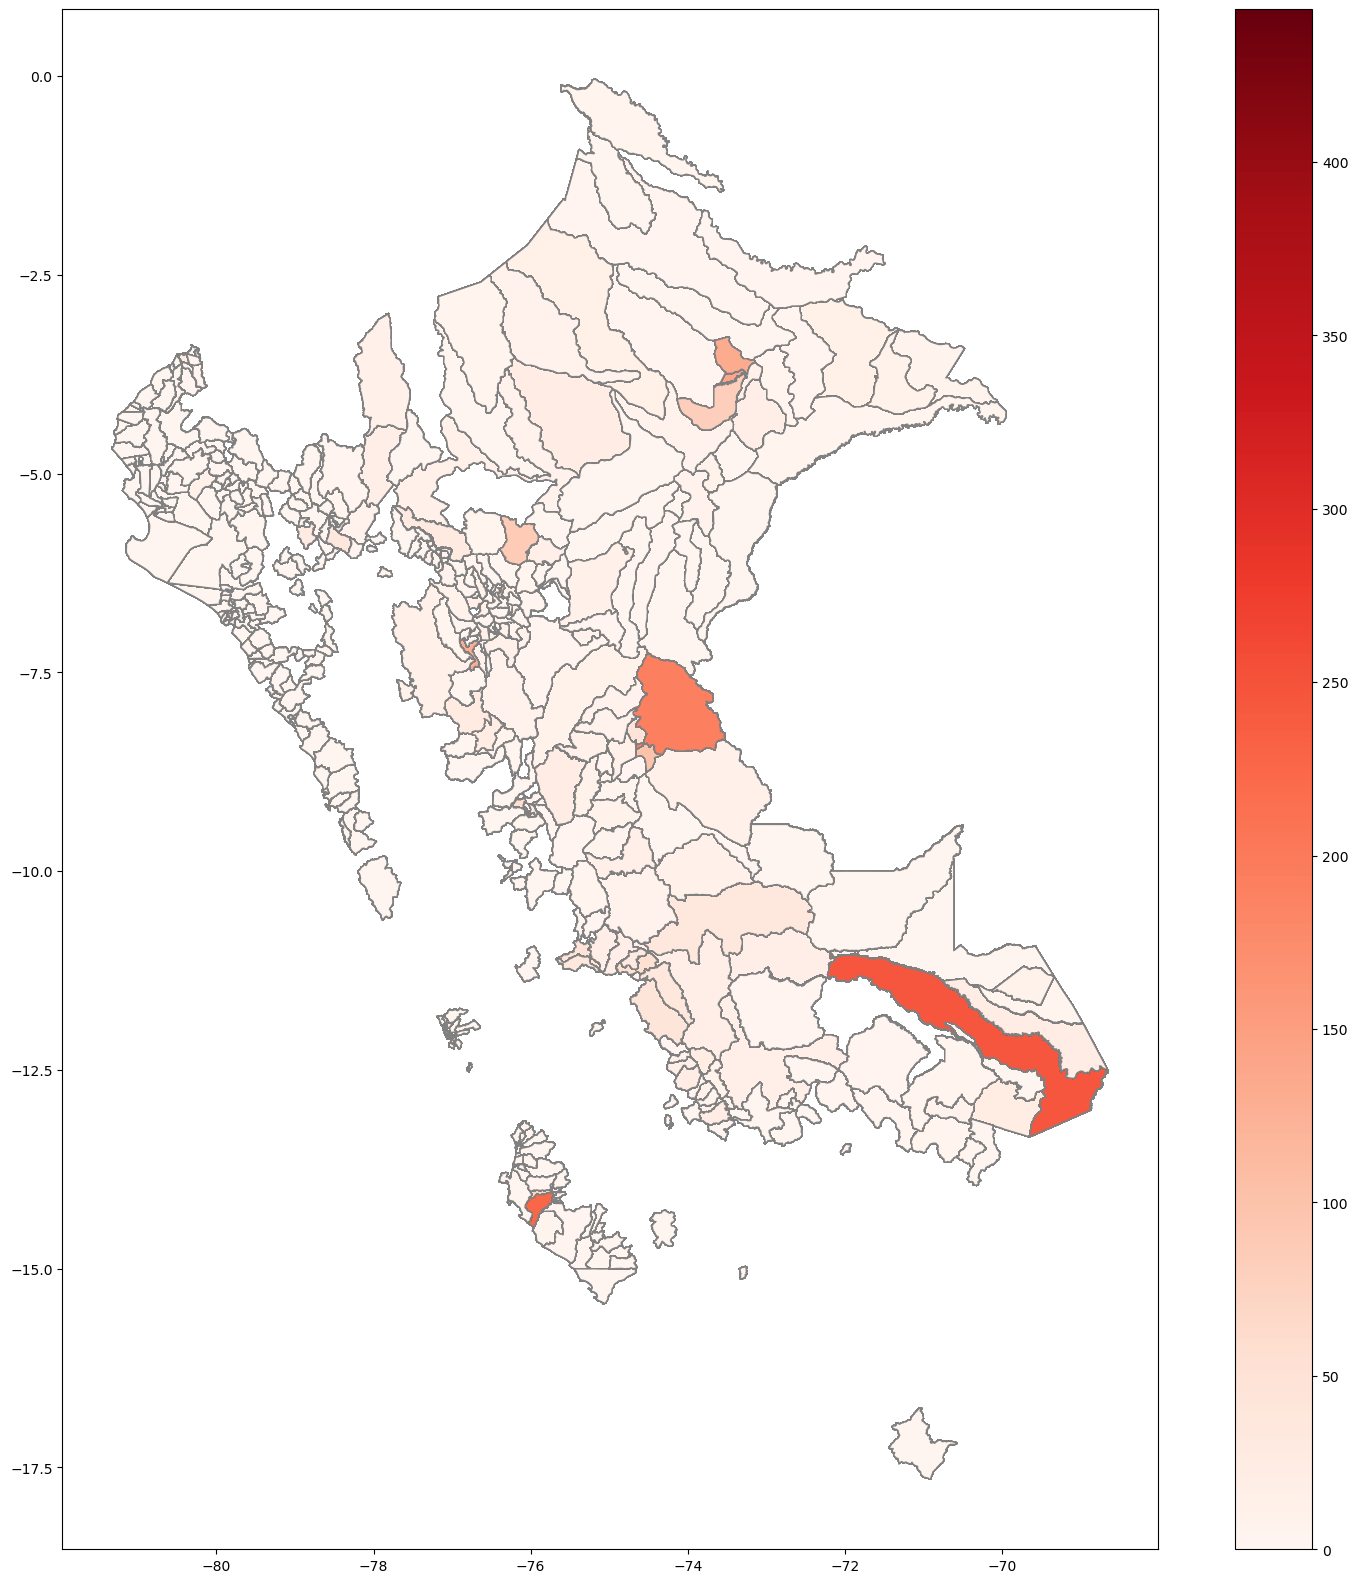

In [178]:
dataset_2021.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

4. Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.
5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.
6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.